<a href="https://colab.research.google.com/github/maab2198/applied_ds_python/blob/course2/applied_plotting/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [0]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
!cp -r gdrive/'My Drive'/applied_ds/applied_plotting/data ./
!ls 

data  gdrive  sample_data


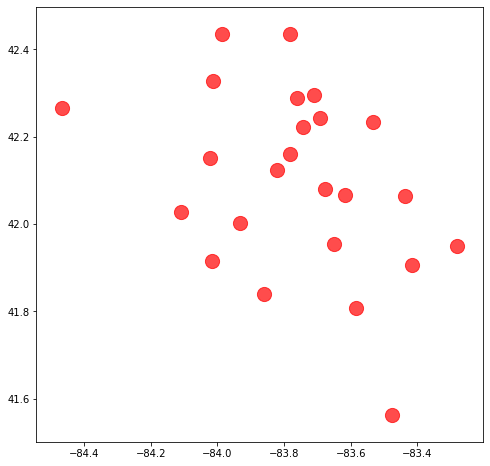

In [0]:
import matplotlib.pyplot as plt
# import mplleaflet

import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd
import numpy as np


#coursera function for map visualization
def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    # return station_locations_by_hash
    return

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [0]:
path = 'data/C2A2_data/BinnedCsvs_d'+str(binsize)+'/'+hashid+".csv"
df = pd.read_csv(path)
df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [0]:
df['Data_Value'] = df['Data_Value'].apply(lambda x: x / 10)

In [0]:
# min and max temp for each day
res_max = df[df['Element'] =='TMAX'].groupby("Date")["Data_Value"].agg(
        TMAX= max,
    )
res_min = df[df['Element'] =='TMIN'].groupby("Date")["Data_Value"].agg(
        TMIN= min,
    )

In [0]:
res = pd.merge(res_max,res_min, how='outer', left_index=True, right_index=True)

In [0]:
res = res.reset_index()
res['Date']= pd.to_datetime(res['Date'])
res['year'] = pd.DatetimeIndex(res['Date']).year 

res["m_date"] = pd.to_datetime(res["Date"]).dt.strftime('%m-%d')

res

,Date,TMAX,TMIN,year,m_date
0,2005-01-01,15.6,-5.6,2005,01-01
1,2005-01-02,13.9,-5.6,2005,01-02
2,2005-01-03,13.3,0.0,2005,01-03
3,2005-01-04,3.9,-3.9,2005,01-04
4,2005-01-05,3.3,-9.4,2005,01-05
...,...,...,...,...,...
4012,2015-12-27,8.3,-0.6,2015,12-27
4013,2015-12-28,6.1,-3.9,2015,12-28
4014,2015-12-29,10.0,-3.9,2015,12-29
4015,2015-12-30,6.7,-2.2,2015,12-30


In [0]:
# get data for 2005-2014
prev_years = res.where((res["year"]< 2015) & (res["m_date"] != '02-29')).groupby("m_date")["TMAX","TMIN"].agg('mean')

In [0]:
# min and max data for 2015
res2015 = res[res["year"] == 2015].set_index("m_date")
prev_years["2015 TMAX"] = res2015["TMAX"]
prev_years["2015 TMIN"] = res2015["TMIN"]

In [0]:
# check if prev records were broken
prev_years["NEW MAX"] = prev_years["2015 TMAX"] > prev_years["TMAX"]
prev_years["NEW MIN"] = prev_years["2015 TMIN"] < prev_years["TMIN"]
prev_years

,TMAX,TMIN,2015 TMAX,2015 TMIN,NEW MAX,NEW MIN
m_date,,,,,,
01-01,5.95,-8.77,1.1,-13.3,False,True
01-02,5.06,-13.15,3.9,-12.2,False,False
01-03,2.95,-12.71,3.9,-6.7,True,False
01-04,2.92,-11.55,4.4,-8.8,True,False
01-05,4.72,-9.82,2.8,-15.5,False,True
...,...,...,...,...,...,...
12-27,6.45,-7.43,8.3,-0.6,True,False
12-28,7.38,-8.36,6.1,-3.9,False,False
12-29,6.39,-8.41,10.0,-3.9,True,False


In [0]:
prev_years.index = pd.to_datetime(prev_years.index,format='%m-%d') 

In [0]:
dates = list(prev_years.index) 
max_val = list(prev_years["TMAX"]) 
min_val = list(prev_years["TMIN"])

current_max = prev_years[prev_years["NEW MAX"]==True]["2015 TMAX"]
current_min = prev_years[prev_years["NEW MIN"]==True]["2015 TMIN"]

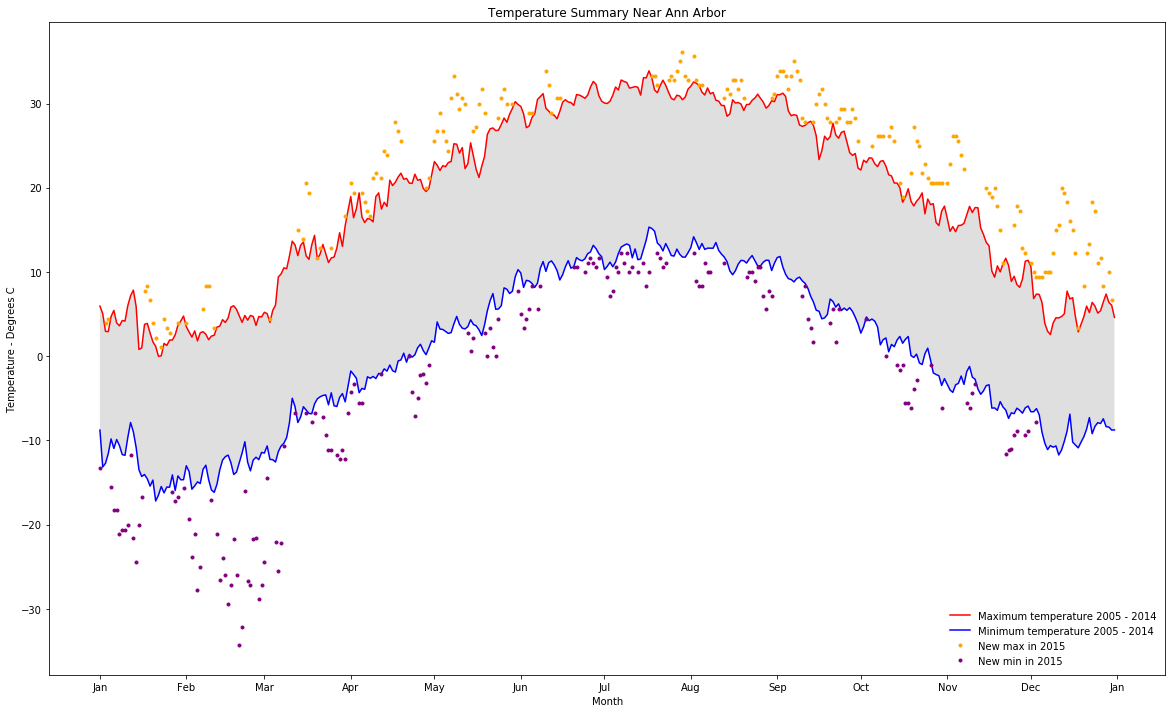

In [0]:
plt.figure(num=None, figsize=(20, 12))

x = plt.gca().xaxis

plt.title('Temperature Summary Near Ann Arbor')
plt.ylabel('Temperature - Degrees C')
plt.xlabel('Month') 

xtick_locator = mdates.MonthLocator()
xtick_formatter = mdates.DateFormatter('%b')

x.set_major_locator(xtick_locator)
x.set_major_formatter(xtick_formatter)

plt.plot(dates, max_val,'',c='red',label = 'Maximum temperature 2005 - 2014' )
plt.plot(dates,min_val ,'',c="blue",label = 'Minimum temperature 2005 - 2014')

# broking prev record
plt.plot(list(current_max.index),list(current_max),  '.', c ="orange",label = 'New max in 2015')
plt.plot(list(current_min.index),list(current_min),  '.', c ="purple",label = 'New min in 2015')

plt.legend(loc = 4, frameon = False)
plt.gca().fill_between(dates, 
                        max_val, min_val, 
                        facecolor='grey', 
                        alpha=0.25)
plt.savefig('foo.png')

<Figure size 432x288 with 0 Axes>